# Tomography Reconstruction Template

This script requires tomographic data in the format [elements, rows, angles, columns], and theta in the format [radians].

This data should be pacakged in an hdf5 file as two seperate datasets. Then, fill out the information below to load the data into the script.

filename: the filename of the hdf5 data

    ie: /nfs/chess/aux/user/jk989/savedData
sinogramName: name of [elements, rows, angles, columns] dataset

    ie: 'sinograms'
    
thetaName: name of [radians] dataset

    ie: 'theta'

moduleFolder: location of tomoFunctions module

    ie: '/nfs/chess/aux/user/jk989'



In [193]:
filename = '' #TODO
sinogramName = '' #TODO
thetaName = '' #TODO
moduleFolder = '' #TODO

Now the script is runnable. The code can be run with no other changes or inputs. However, it is flexible, with many optional parameters. See the manual for the list of options.

Importing the functions module lets us access all the GUI and reconstruction methods.

In [5]:
import sys
sys.path.append(moduleFolder)
import tomoFunctions as tf
%matplotlib notebook

Here we load the tomography data according to the fileName, sinogramName, and thetaName provided.

In [6]:
data = tf.loadHDF5(filename, sinogramName, thetaName)
sinograms = data[0]
theta = data[1]

Now we chose the area of interest. Select the top left corner and bottom right corner of the sample space. These determine the layerBounds (y axis) and imageBounds (x axis).

<IPython.core.display.Javascript object>


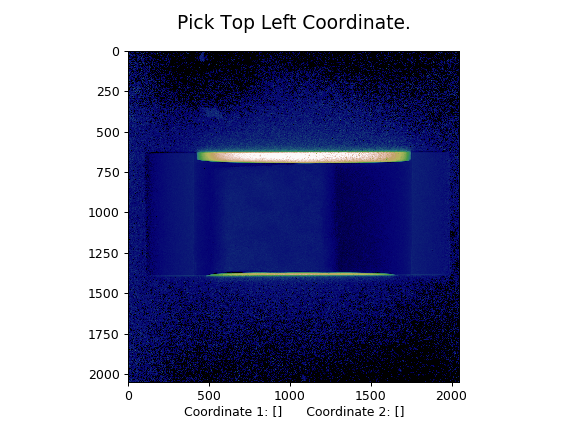

In [194]:
bounds = tf.launchBoundHelper(sinograms[0,:,len(sinograms[0][0])//2,:], cmap = 'gist_earth')

Run to store the information picked in the GUI into variables.

In [28]:
imageBounds = bounds.getImageBounds()
layerBounds = bounds.getLayerBounds()

Now the reconstruction process begins. We need to find the center of an upper layer and a lower layer. Then, we can extrapolate and find the centers for all layers.

The GUI uses layerBounds to chose the display image. If the sample is not in the extremes of the layerBounds,  use the GUI to change the layer to something closer to the center of the sample.

The following code finds the center for the top layerBound.

IMPORTANT NOTE: When inputing a negative center, use neg(x) NOT -x.

<IPython.core.display.Javascript object>


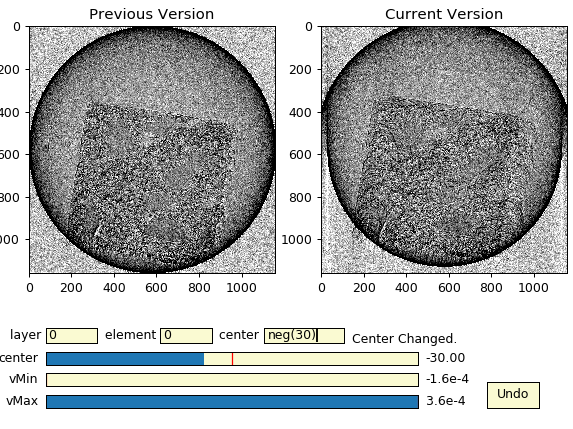

In [191]:
topVals = tf.launchValHelper(sinograms, imageBounds, layerBounds[0], layerBounds, theta, sigma = .4, ncore = 24)

Now we load the reconstruction parameters for the top layer into variables.

In [147]:
topCenter = topVals.getCenter()
topLayer = topVals.getLayer()

Now we repeat the process for the bottom layer.

<IPython.core.display.Javascript object>


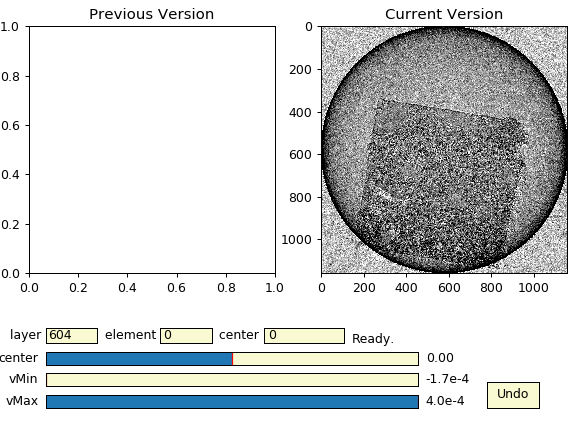

In [161]:
bottomVals = tf.launchValHelper(sinograms, imageBounds, layerBounds[1], layerBounds, theta, sigma = .4, ncore = 24)

Load the reconstruction parameters for the bottom layer into variables.

In [157]:
bottomCenter = bottomVals.getCenter()
bottomLayer = bottomVals.getLayer()

Here we find the centers for all layers. This function calculates the centers for all the layers in layerBounds.

In [158]:
centers = tf.calcCenters(layerBounds, topCenter, topLayer, bottomCenter, bottomLayer)

Now that all the parameters have been found, the sample can be reconstructed.

In [167]:
recons = tf.reconstruct(sinograms, centers, imageBounds, layerBounds, theta, ncore = 24)

Loading image #0
Loading image #100
Loading image #200
Loading image #300
Loading image #400
Loading image #500
Loading image #600


As a check, you can view slices of the reconstruction with multiSliceGiffer() or multiSliceViewer().

NOTE: Close previous GUIs before launching.

<IPython.core.display.Javascript object>


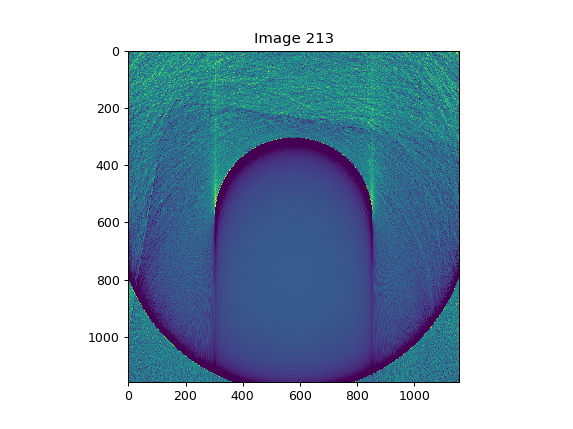

In [192]:
tf.multiSliceGiffer(recons[0])

Optional tweaking can be done with the GUIs or crop() and rotate() functions. It is easier to tweak by reconstructing and plotting singular layers, so use reconstruct() with scalar inputs and plotLayer().
    #reconstructs only one layer of one element.
    recon = reconstruct(sinograms[0], center, imageBounds, layer...) 

    #plots the reconstruction
    plotLayer(recon[0][0])
    
    #rotates image 30 degrees
    recon = crop(recon,30)
    
    #crops image to left, right, top, bottom bounds
    recon = crop(recon, 50, 800, 100, 600)

Then you can run the functions on the full stack to get a final reconstruction.


Once the reconstructions are finalized, save the files here. You can save more than one dataset.

In [ ]:
fileName = '' #TODO
reconName = '' #TODO
tf.save(fileName, [reconName], [recons])